# Feature Engineering
# Klassifikation
## Instanzbasierte Modelle

**Vorbereitung der Umgebung**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)

**Vorbereitung der Daten**

In [6]:
## load data
data = pd.read_csv('bank_data_prep.csv')
data.shape  ## check

## features - target - split
## organize features and target as independent objects
X = data.drop('y', axis=1)
y = data['y']

## test - train - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=2 / 3,
    random_state=1234)

## demo dataset
demo_data = pd.read_csv('demo_data_class.csv')
X_demo = demo_data.drop('y', axis=1)
y_demo = demo_data['y']

### KNeighborsClassifier
#### Theorie
#### Praxis

In [8]:
## import trainer class
from sklearn.neighbors import KNeighborsClassifier

In [9]:
## instantiate (and parameterize) the model
model = KNeighborsClassifier()

In [10]:
## train model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
## show effective parameters
print(model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [12]:
## apply model to test data
y_pred = model.predict(X_test)

C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


if `model.predict()` causes error like "'NoneType' object has no attribute 'split'", upgrade
threadpoolctl to version 3.1.0 like this

    !pip install threadpoolctl==3.1.0

In [14]:
## show confusion matrix, actual vs. predicted target values
print(pd.crosstab(y_pred, y_test))

y        no   yes
row_0            
no     1384   473
yes     351  1079


In [15]:
## calculate accuracy manually:
## rate of correct predicted classes divided by all observations
print(np.diag(pd.crosstab(y_pred, y_test)).sum() / y_test.size)

0.7493154852449042


In [16]:
## accuracy as imported function from sklearn.metrics
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.7493154852449042


In [17]:
## accuracy as internal model scorer
print(model.score(X_test, y_test))

0.7493154852449042


#### Parameter Tuning

1 0.7003346516580469
2 0.7027684818983876
3 0.7377547916032857
4 0.7423182233039245
5 0.7493154852449042
6 0.7505324003650745
7 0.7520535442652875
8 0.7517493154852449
9 0.7554000608457561
10 0.7532704593854579
11 0.7608761788865227
12 0.7532704593854579
13 0.7602677213264375
14 0.7554000608457561
15 0.7578338910860968
16 0.7550958320657134
17 0.7541831457255856
18 0.7529662306054152
19 0.7511408579251597
20 0.7517493154852449


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


CPU times: total: 1min 35s
Wall time: 26.7 s


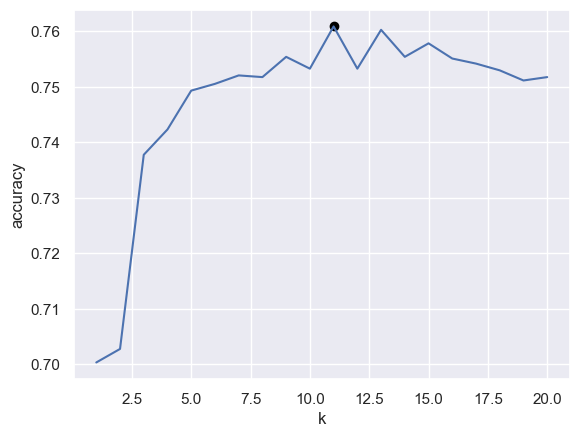

In [19]:
%%time

## another outlook: parameter tuning
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

params = range(1, 21) ## k values as range from 1 to 20 by 1
scores = []           ## empty list for collecting score results by iteration

## iterate over params
for param in params:
    model.set_params(n_neighbors=param)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    print(param, model.score(X_test, y_test)) ## for trace progress only
    
## visualization
fig = sns.lineplot(x=params, y=scores)
plt.scatter(x=params[scores.index(max(scores))], y=max(scores), color="black")
plt.xlabel('k')
plt.ylabel('accuracy');

#### Standardisieren von gesplitteten Daten

In [21]:
## get standardization parameters on the base of training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(X_train)

## apply standardization to both data sets
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [22]:
## check
## compare mean and std of data and scaler attribute
print(scaler.mean_[0:3])
print(X_train.iloc[:,[0,1,2]].mean())
print(scaler.scale_[0:3])
print(X_train.iloc[:,[0,1,2]].std())

## compare mean and std before and after scalint
print(X_train_sc.iloc[:,[0,1,2]].mean())
print(X_train_sc.iloc[:,[0,1,2]].std())
print(X_test_sc.iloc[:,[0,1,2]].mean())
print(X_test_sc.iloc[:,[0,1,2]].std())

[40.2715655   4.4179218   0.55256352]
age          40.271565
education     4.417922
housing       0.552564
dtype: float64
[11.83482251  1.65671617  0.4972294 ]
age          11.835723
education     1.656842
housing       0.497267
dtype: float64
age          1.297203e-17
education   -1.086407e-16
housing      1.135052e-16
dtype: float64
age          1.000076
education    1.000076
housing      1.000076
dtype: float64
age          0.027978
education    0.023008
housing      0.001667
dtype: float64
age          0.995850
education    0.986509
housing      0.999975
dtype: float64


### Weitere Instanzbasierte Methoden

(kein Code)

### Data Preparation für weitere Klassifikatoren (und Regressoren)